# Web Scraping - Lab

## Introduction

Now that you've seen a more extensive example of developing a web scraping script, it's time to further practice and formalize that knowledge by writing functions to parse specific pieces of information from the web page and then synthesizing these into a larger loop that will iterate over successive web pages in order to build a complete dataset.

## Objectives

You will be able to:

* Navigate HTML documents using Beautiful Soup's children and sibling relations
* Select specific elements from HTML using Beautiful Soup
* Use regular expressions to extract items with a certain pattern within Beautiful Soup
* Determine the pagination scheme of a website and scrape multiple pages

## Lab Overview

This lab will build upon the previous lesson. In the end, you'll look to write a script that will iterate over all of the pages for the demo site and extract the title, price, star rating and availability of each book listed. Building up to that, you'll formalize the concepts from the lesson by writing functions that will extract a list of each of these features for each web page. You'll then combine these functions into the full script which will look something like this:  

```python
df = pd.DataFrame()
for i in range(2,51):
    url = "http://books.toscrape.com/catalogue/page-{}.html".format(i)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    new_titles = retrieve_titles(soup)
    new_star_ratings = retrieve_ratings(soup)
    new_prices = retrieve_prices(soup)
    new_avails = retrieve_avails(soup)
    ...
 ```

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [2]:
base_url = 'http://books.toscrape.com'
page = requests.get(base_url)
page.status_code

200

In [60]:
soup = BeautifulSoup(page.content, 'html.parser')
for p in soup.find_all("li", class_="next"):
    print(p.a.get('href'))

catalogue/page-2.html


## Retrieving Titles

To start, write a function that extracts the titles of the books on a given page. The input for the function should be the `soup` for the HTML of the page.

In [30]:
def retrieve_titles(soup):
    #Your code here
    titles = []
    for h3 in soup.find_all('h3'):
        titles.append(h3.a.get('title'))
    return titles

## Retrieve Ratings

Next, write a similar function to retrieve the star ratings on a given page. Again, the function should take in the `soup` from the given HTML page and return a list of the star ratings for the books. These star ratings should be formatted as integers.

In [31]:
def retrieve_ratings(soup):
    #Your code here
    ratings = []
    for p in soup.find_all("p", class_="star-rating"):
        ratings.append(p.get('class')[1])
    return ratings

## Retrieve Prices

Now write a function to retrieve the prices on a given page. The function should take in the `soup` from the given page and return a list of prices formatted as floats.

In [32]:
def retrieve_prices(soup):
    #Your code here
    prices = []
    for p in soup.find_all("p", class_="price_color"):
        prices.append(float(p.text[1:]))
    return prices

## Retrieve Availability

Write a function to retrieve whether each book is available or not. The function should take in the `soup` from a given html page and return a list of the availability for each book.

In [35]:
def retrieve_avails(soup):
    #Your code here
    avail = []
    for p in soup.find_all("p", class_="availability"):
        avail.append(p.text.strip())
    return avail

## Retrieve Next Page URL

In [92]:
# doesnt need a loop, should only have one next li per page
def retrieve_next(soup):
    try:
        url = soup.find("li", class_="next").a.get('href')
        if 'catalogue' in url.split('/'):
            return url.split('/')[1]
        else:
            return url
    except AttributeError:
        return None

## Create a Script to Retrieve All the Books From All 50 Pages

Finally, write a script to retrieve all of the information from all 50 pages of the books.toscrape.com website. 

In [49]:
#Your code here
cols = ['title', 'stars', 'price', 'availability']
df = pd.DataFrame(columns=cols)

for i in range(2,51):
    url = "http://books.toscrape.com/catalogue/page-{}.html".format(i)
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    new_titles = retrieve_titles(soup)
    new_star_ratings = retrieve_ratings(soup)
    new_prices = retrieve_prices(soup)
    new_avails = retrieve_avails(soup)
    new_df = pd.DataFrame([new_titles, new_star_ratings, new_prices, new_avails]).transpose()
    new_df.columns = cols
    df = df.append(new_df)    


df.head()

,title,stars,price,availability
0,In Her Wake,One,12.84,In stock
1,How Music Works,Two,37.32,In stock
2,Foolproof Preserving: A Guide to Small Batch J...,Three,30.52,In stock
3,Chase Me (Paris Nights #2),Five,25.27,In stock
4,Black Dust,Five,34.53,In stock


In [50]:
df.sample(10)

,title,stars,price,availability
5,Life of Pi,Four,13.22,In stock
19,Lady Renegades (Rebel Belle #3),Five,53.04,In stock
14,The New Guy (and Other Senior Year Distractions),Three,44.92,In stock
0,Nightstruck: A Novel,Four,50.35,In stock
16,Catherine the Great: Portrait of a Woman,Four,58.55,In stock
6,This Is Your Brain on Music: The Science of a ...,One,38.4,In stock
1,If I Stay (If I Stay #1),Five,38.13,In stock
19,The Selfish Gene,One,29.45,In stock
8,The Perfect Play (Play by Play #1),Three,59.99,In stock
2,"Y: The Last Man, Vol. 1: Unmanned (Y: The Last...",Four,18.51,In stock


## Level-Up: Write a new version of the script you just wrote. 

If you used URL hacking to generate each successive page URL, instead write a function that retrieves the link from the `"next"` button at the bottom of the page. Conversely, if you already used this approach above, use URL-hacking (arguably the easier of the two methods in this case).

In [93]:
url = 'http://books.toscrape.com'
html_page = requests.get(url)
soup = BeautifulSoup(html_page.content, 'html.parser')
next_page = retrieve_next(soup)
#Your code here
while next_page:
    url = "http://books.toscrape.com/catalogue/{}".format(next_page)
    html_page = requests.get(url)
    soup = BeautifulSoup(html_page.content, 'html.parser')
    next_page = retrieve_next(soup)
    new_titles = retrieve_titles(soup)
    new_star_ratings = retrieve_ratings(soup)
    new_prices = retrieve_prices(soup)
    new_avails = retrieve_avails(soup)
    new_df = pd.DataFrame([new_titles, new_star_ratings, new_prices, new_avails]).transpose()
    new_df.columns = cols
    df = df.append(new_df) 

http://books.toscrape.com/catalogue/page-2.html
page-3.html
http://books.toscrape.com/catalogue/page-3.html
page-4.html
http://books.toscrape.com/catalogue/page-4.html
page-5.html
http://books.toscrape.com/catalogue/page-5.html
page-6.html
http://books.toscrape.com/catalogue/page-6.html
page-7.html
http://books.toscrape.com/catalogue/page-7.html
page-8.html
http://books.toscrape.com/catalogue/page-8.html
page-9.html
http://books.toscrape.com/catalogue/page-9.html
page-10.html
http://books.toscrape.com/catalogue/page-10.html
page-11.html
http://books.toscrape.com/catalogue/page-11.html
page-12.html
http://books.toscrape.com/catalogue/page-12.html
page-13.html
http://books.toscrape.com/catalogue/page-13.html
page-14.html
http://books.toscrape.com/catalogue/page-14.html
page-15.html
http://books.toscrape.com/catalogue/page-15.html
page-16.html
http://books.toscrape.com/catalogue/page-16.html
page-17.html
http://books.toscrape.com/catalogue/page-17.html
page-18.html
http://books.toscrape.c

## Summary

Well done! You just completed your first full web scraping project! You're ready to start harnessing the power of the web!

In [94]:
df.head()

,title,stars,price,availability
0,In Her Wake,One,12.84,In stock
1,How Music Works,Two,37.32,In stock
2,Foolproof Preserving: A Guide to Small Batch J...,Three,30.52,In stock
3,Chase Me (Paris Nights #2),Five,25.27,In stock
4,Black Dust,Five,34.53,In stock


In [95]:
df.describe()

,title,stars,price,availability
count,9160,9160,9160.00,9160
unique,979,5,887.00,1
top,You can't bury them all: Poems,Three,44.18,In stock
freq,315,2467,321.00,9160


In [96]:
df.sample(10)

,title,stars,price,availability
6,America's Cradle of Quarterbacks: Western Penn...,Three,22.5,In stock
18,Behind Closed Doors,Four,52.22,In stock
4,Black Dust,Five,34.53,In stock
19,The Lonely Ones,Five,43.59,In stock
17,"In a Dark, Dark Wood",One,19.63,In stock
4,The Husband's Secret,Five,52.51,In stock
4,Candide,Three,58.63,In stock
9,El Deafo,Five,57.62,In stock
15,Lumberjanes Vol. 3: A Terrible Plan (Lumberjan...,Two,19.92,In stock
13,The Bear and the Piano,One,36.89,In stock


In [99]:
df['price'] = df['price'].astype('float64')

In [101]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123d04b00>]],
      dtype=object)

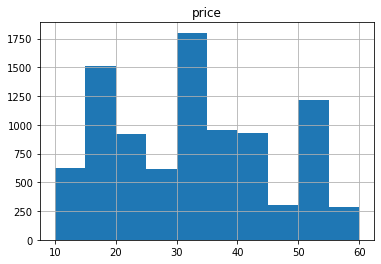

In [102]:
df.hist()